# Bagging

Los métodos de bagging son sistemas donde varios algoritmos simples son usados en paralelo. El principal objetivo de los métodos en paralelo es el de aprovecharse de la independencia que hay entre los algoritmos simples, ya que el error se puede reducir bastante al promediar las salidas de los modelos simples. Es como si, queriendo resolver un problema entre varias personas independientes unas de otras, se diese por bueno lo que eligiese la mayoría de las personas.

Para obtener la agregación de las salidas de cada modelo simple e independiente, el bagging puede usar la votación para los métodos de clasificación y el promedio para los métodos de regresión. El método de bagging es muy útil realizarlo cuando el error en validación es mucho mayor que el error en entrenamiento y se está sobreajustando a los datos de entrenamiento, ya que, al utilizar una votación o promedio de varios modelos, el sobreajuste que haga un modelo se corrige por el resto.

## Bosques Aleatorios (RANDOM FOREST)
Breiman (2001) define los bosques aleatorios (Random forests) como un conjunto de clasificadores tales que:

1. Sus algoritmos base son los árboles de decisión.
2. Cada árbol se entrena a partir de un subconjunto de los datos usando un muestreo de bootstrap.
3. También cada árbol se entrena con un subconjunto de las variables.

Al usar bosques aleatorios, se construirán árboles de decisión independientes a partir de conjuntos de datos distintos y variables independientes distintas. Posteriormente, en problemas de regresión, se obtiene la media de las predicciones de la variable dependiente. Ese resultado medio de las predicciones de cada árbol de decisión por separado es la predicción del bosque aleatorio.

In [1]:
# Librerias
from numpy import mean, std
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, RepeatedKFold
import numpy as np
import matplotlib.pyplot as plt

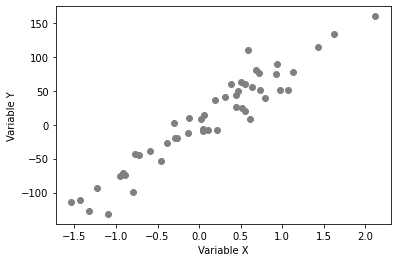

In [5]:
# Crear dataset con solo 1 feature
X, y = make_regression(n_samples = 50, n_features = 1, n_informative = 15, noise = 20)

plt.xlabel("Variable X")
plt.ylabel("Variable Y")
plt.scatter(X, y, color = "grey")
plt.show()

En el siguiente código se muestra cómo realizar una validación pero esta vez sin optimizar los parámetros del modelo. Para optimizar los parámetros se utilizaba `GridSearchCV`, que prueba todas las combinaciones de los parámetros (GridSearch) validándolos con validación cruzada (CV, de cross validation). En este caso simplemente se validan los parámetros por defecto con la función `RepeatedKFold`.

In [7]:
# Definir un modelo
model = RandomForestRegressor()

cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = -1, error_score = 'raise')
print(u'Se obtiene el error absoluto medio (MAE): %.3f, desviación %.3f' % (mean(n_scores), std(n_scores)))

Se obtiene el error absoluto medio (MAE): -21.742, desviación 7.503


In [10]:
# Ajuste del modelo a los datos
model.fit(X,y)

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid),1))
y_prediccion = model.predict(X_grid)

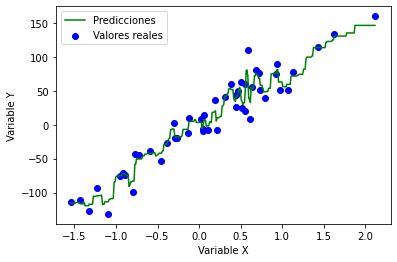

In [11]:
# Visualización
plt.scatter(X, y, color = 'blue', label = "Valores reales")
plt.plot(X_grid, y_prediccion, color = "green", label = "Predicciones")
plt.xlabel("Variable X")
plt.ylabel("Variable Y")
plt.legend()
plt.show()

En la figura arriba se muestra en verde la estimación del _Random forest_ con los parámetros por defecto. Incluso no habiendo optimizado los parámetros, los resultados son relativamente buenos; esto es debido a que es un método que generaliza muy bien. Independientemente, se recomienda siempre que sea posible optimizar los parámetros con `GridSearch`.